In [12]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools

In [13]:
model = Sequential()  

In [14]:
class Onehot2Int(object):
    """To plot the decision boundary"""
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [15]:
def theOriginalNN(X,Y):
    """
    The NN model which we will train and get the weights for the new
    NN model
    """    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    

    feature_vector_shape = len(X_train[0])
    input_shape = (feature_vector_shape,)
#     print("Input shape",input_shape)
#     print(f'Feature shape: {input_shape}')
    
    model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))  


 
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

     #print("Weights and biases of the layers before training the model: \n")
#     for layer in model.layers:
#         print(layer.name)
#         print("Weights")
#         print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
#         print("Bias")
#         print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 500   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=0)
    
#     print("Weights and biases of the layers after training the model: \n")
#     for layer in model.layers:
#         print(layer.name)
#         print("Weights")
#         print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
#         print("Bias")
#         print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
        
    #predict
    pred = model.predict(X_train)
    print("After Prediction of model", pred)
   
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    graph_it(Loss, Epoch, Accuracy, model,scores,X_train, X_test, Y_train, Y_test, Y_tt)

#     weights = model.layers[0].get_weights()[0]
#     biases = model.layers[0].get_weights()[1]
    
    
    




In [16]:
def graph_it(Loss, Epoch, Accuracy, model,scores,X_train, X_test, Y_train, Y_test,Y_tt):
    """
    Creating all the graphs:
    1. Loss vs Epoch
    2. Accuracy vs Epoch
    3. The decision boundarys
    """
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    # Plot decision boundary
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    
    plt.figure(figsize=(10,7))
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    
    

In [17]:
def theNewNN(X,Y):
    """
    The NN model which will be trained by the weights 
    we got by the OriginalNN()
    """
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
    
#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    

    
    # Setting new weights and biases
    for layer in model.layers:
        a,b = layer.get_weights()[0].shape
        layer.set_weights([np.random.randn(a,b), np.ones(layer.get_weights()[1].shape)])
        
#     print("Weights and biases of the layers after setting the new weights and biases: \n")
#     for layer in model.layers:
#         print(layer.name)
#         print("Weights")
#         print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
#         print("Bias")
#         print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
   
    e = 500   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=0)
    
#     print("Weights and biases of the layers after setting the new weights and biases: \n")
#     for layer in model.layers:
#         print(layer.name)
#         print("Weights")
#         print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
#     print("Bias")
#     print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
    
    
    #predict
    pred = model.predict(X_train)
    print("After Prediction of model", pred)
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    graph_it(Loss, Epoch, Accuracy, model,scores,X_train, X_test, Y_train, Y_test, Y_tt)


    



In [18]:
#Old Dataset
def OldDataset():
    """
    The dataset for the original model
    """
    #Class 1
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,1000)

    #Class 2
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,1000)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theOriginalNN(X,Y)
    

In [19]:
#New Dataset
def NewDataset(i):
    """
    The dataset for the new model
    """
    #Class 3
    mean = [i,i]
    cov = [[10,0],
           [0,10]] 
    Class3 = np.random.multivariate_normal(mean,cov,1000)

    #Class 4
    mean = [(-i),i]
    cov = [[10,0],
           [0,10]] 
    Class4 = np.random.multivariate_normal(mean,cov,1000)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    
    
    theNewNN(X,Y)

****************************The Original NN*************************************


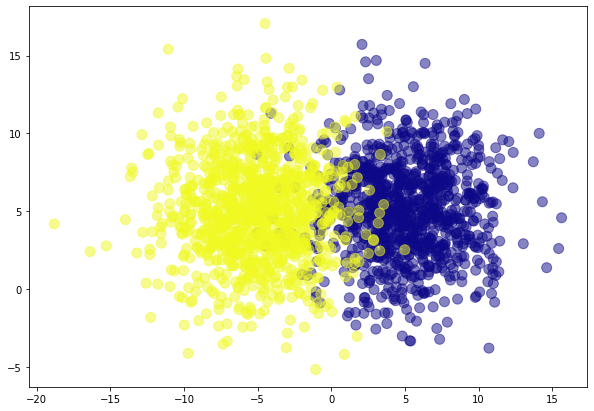

After Prediction of model [[9.9974781e-01 2.5214080e-04]
 [9.4816554e-01 5.1834550e-02]
 [2.7083293e-02 9.7291678e-01]
 ...
 [9.6811318e-01 3.1886805e-02]
 [9.9801922e-01 1.9807355e-03]
 [9.3392324e-01 6.6076741e-02]]
19/19 [==============================] - 0s 683us/step - loss: 0.1287 - accuracy: 0.9567


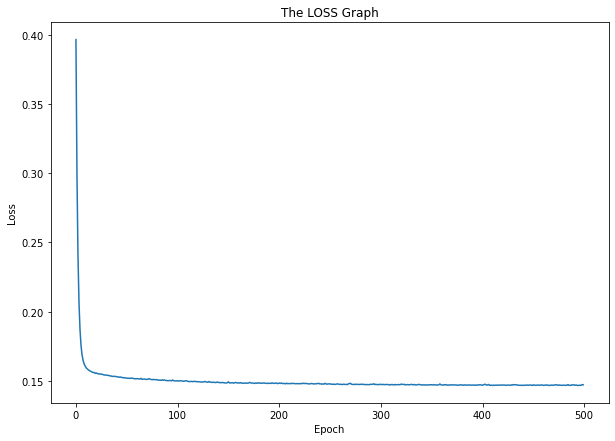

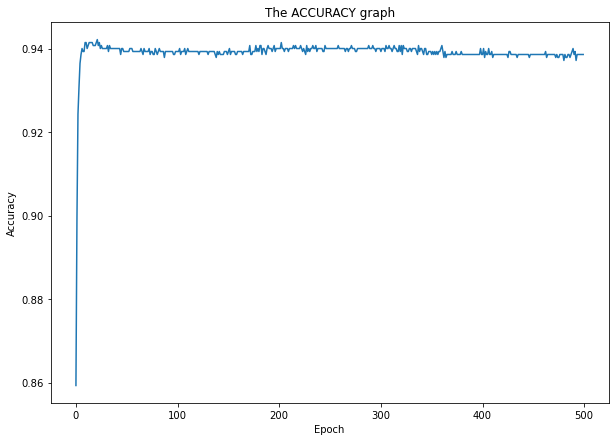

Test results - Loss: 0.12874194979667664 - Accuracy: 95.6666648387909%


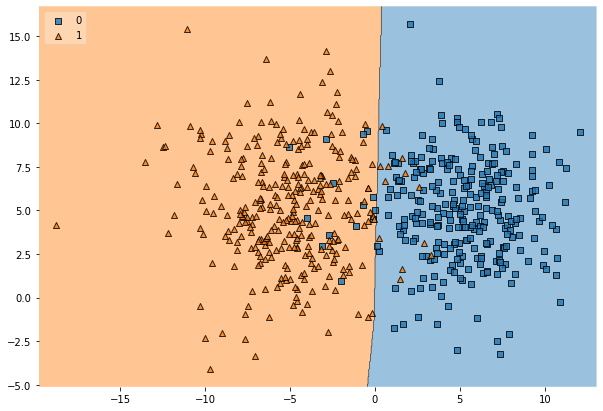


**************************The  1  NN************************************


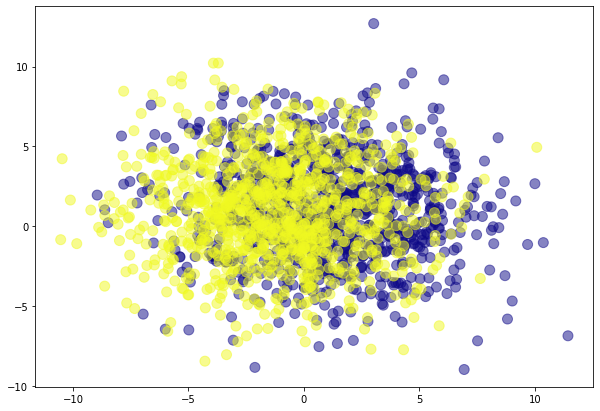

After Prediction of model [[0.7971207  0.20287926]
 [0.2586264  0.7413736 ]
 [0.43835014 0.56164986]
 ...
 [0.14169364 0.85830635]
 [0.43338433 0.5666157 ]
 [0.5882797  0.4117203 ]]
19/19 [==============================] - 0s 577us/step - loss: 0.6800 - accuracy: 0.5983


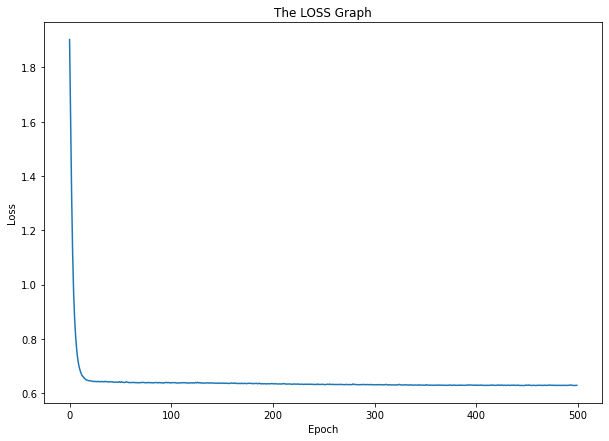

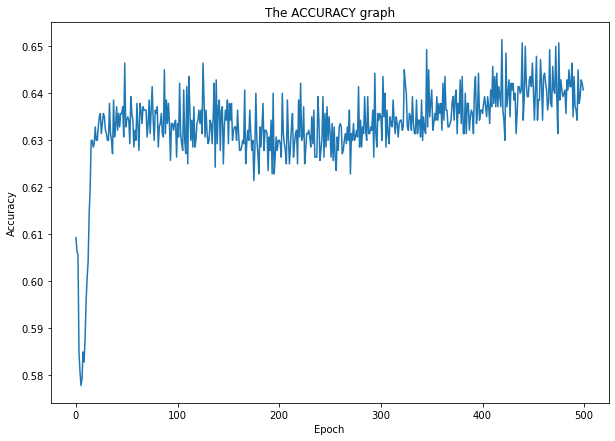

Test results - Loss: 0.6800094246864319 - Accuracy: 59.833335876464844%


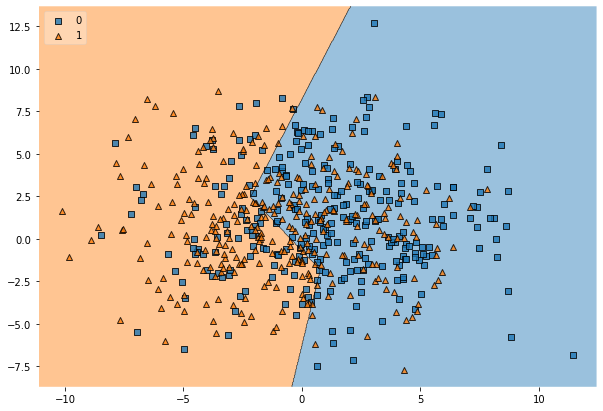


**************************The  2  NN************************************


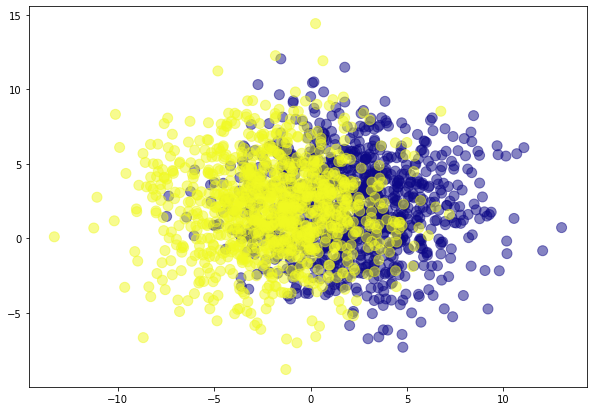

After Prediction of model [[0.8305452  0.16945481]
 [0.95735186 0.04264816]
 [0.8214196  0.17858045]
 ...
 [0.86453587 0.13546412]
 [0.7310293  0.26897064]
 [0.29869732 0.70130265]]
19/19 [==============================] - 0s 589us/step - loss: 0.5462 - accuracy: 0.7283


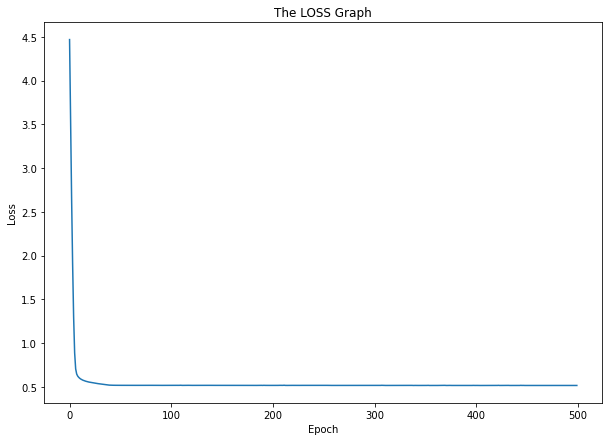

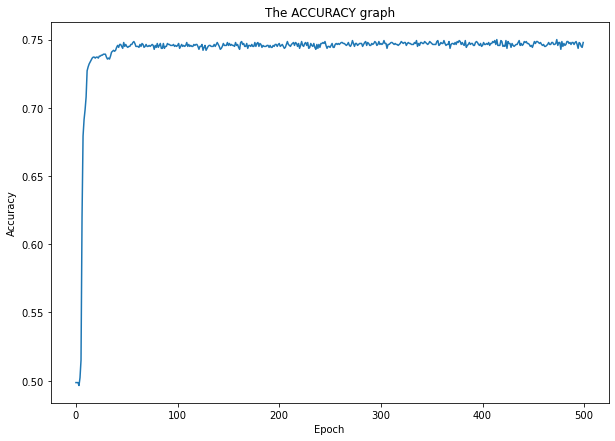

Test results - Loss: 0.5461957454681396 - Accuracy: 72.83333539962769%


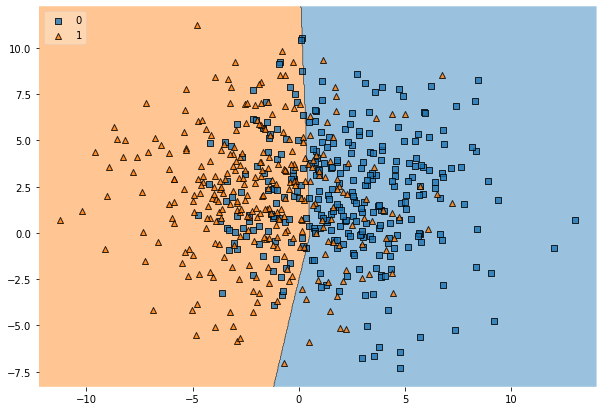


**************************The  3  NN************************************


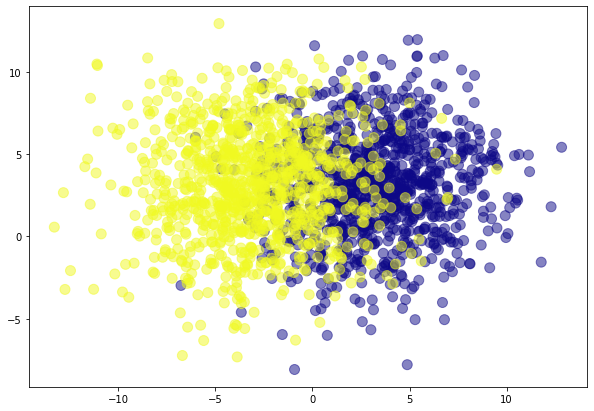

After Prediction of model [[0.968002   0.0319979 ]
 [0.16881096 0.8311891 ]
 [0.09007378 0.90992624]
 ...
 [0.6315228  0.36847723]
 [0.12022321 0.8797768 ]
 [0.60054773 0.39945227]]
19/19 [==============================] - 0s 683us/step - loss: 0.3953 - accuracy: 0.8183


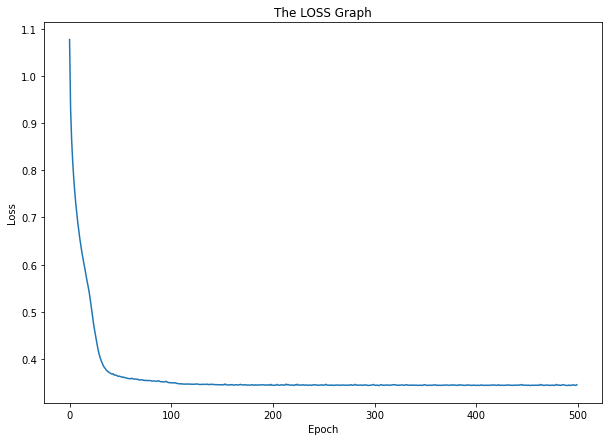

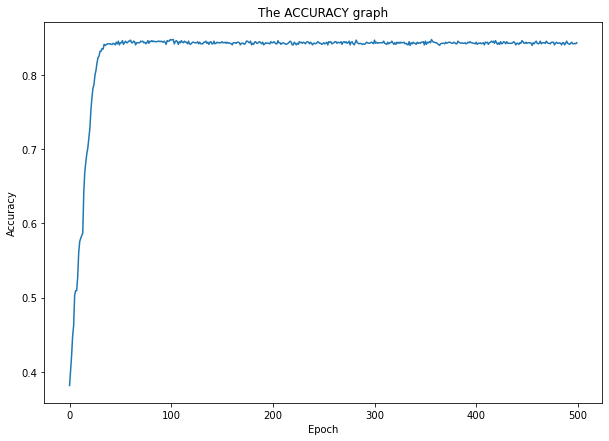

Test results - Loss: 0.3953355848789215 - Accuracy: 81.83333277702332%


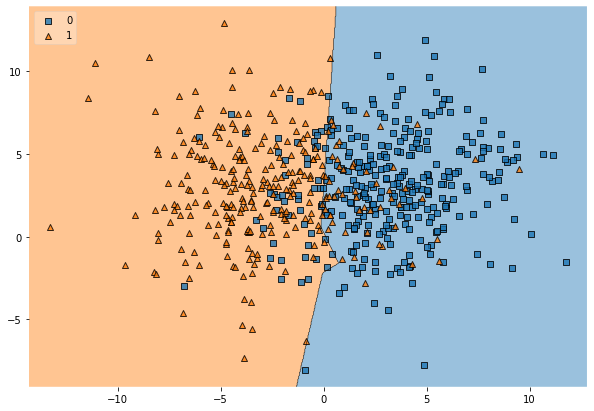


**************************The  4  NN************************************


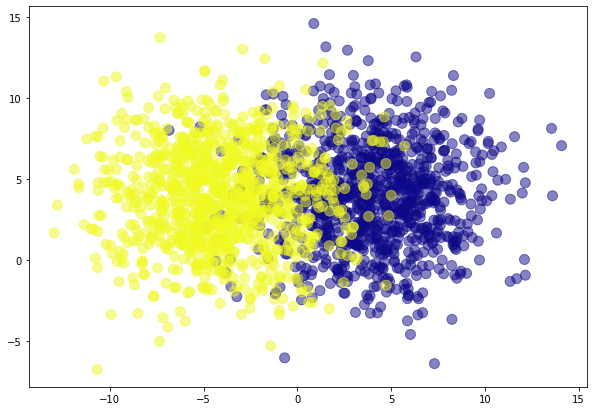

After Prediction of model [[1.9362885e-01 8.0637115e-01]
 [9.6690434e-01 3.3095635e-02]
 [9.8365593e-01 1.6344044e-02]
 ...
 [8.4660774e-01 1.5339223e-01]
 [8.8533646e-01 1.1466358e-01]
 [7.9751125e-04 9.9920255e-01]]
19/19 [==============================] - 0s 682us/step - loss: 0.3037 - accuracy: 0.8667


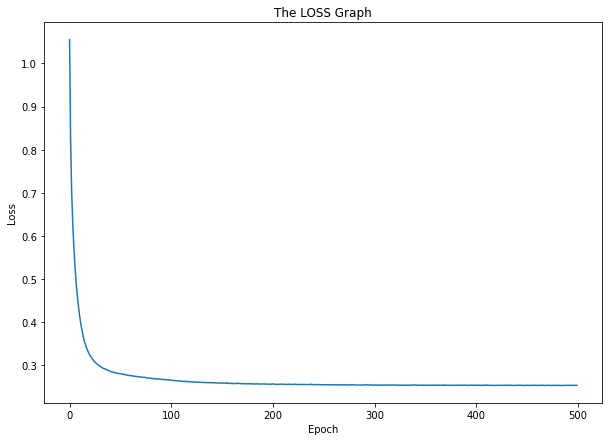

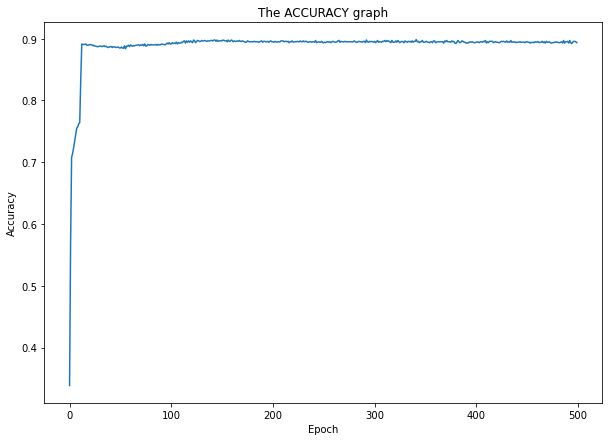

Test results - Loss: 0.30372220277786255 - Accuracy: 86.66666746139526%


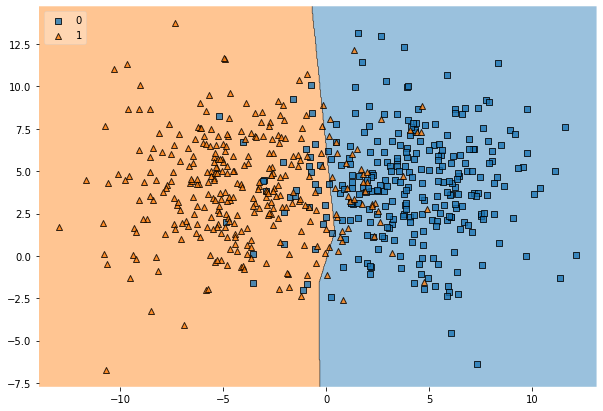


**************************The  5  NN************************************


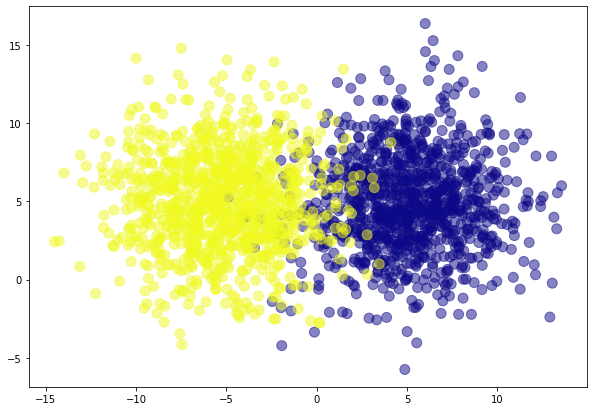

After Prediction of model [[0.99680245 0.00319752]
 [0.9963135  0.00368648]
 [0.9968119  0.00318807]
 ...
 [0.84882766 0.15117233]
 [0.13527267 0.8647273 ]
 [0.00268188 0.9973181 ]]
19/19 [==============================] - 0s 630us/step - loss: 0.1291 - accuracy: 0.9517


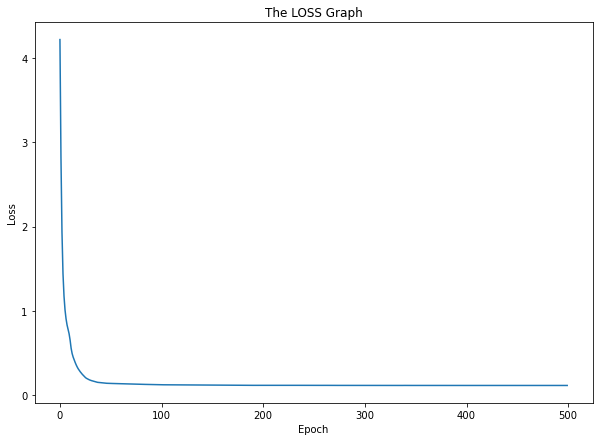

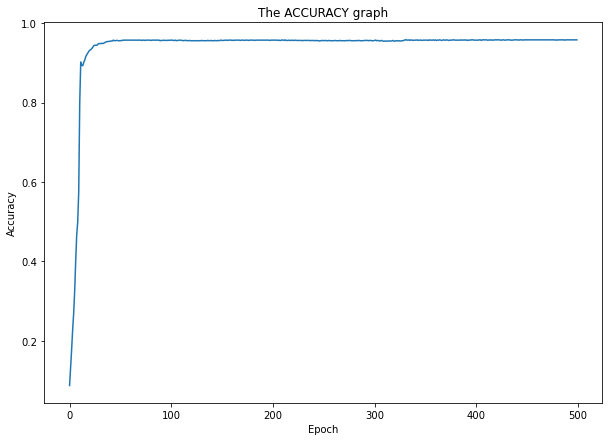

Test results - Loss: 0.1291157603263855 - Accuracy: 95.16666531562805%


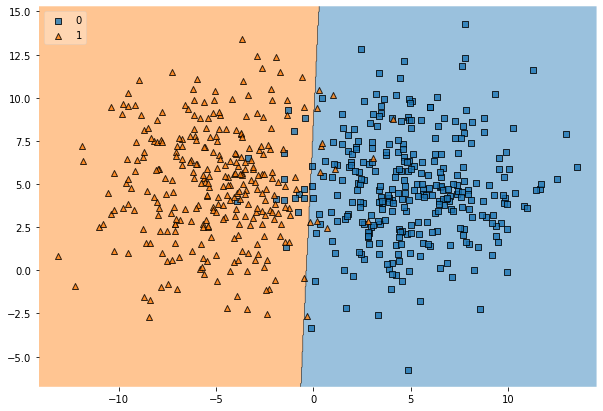


**************************The  6  NN************************************


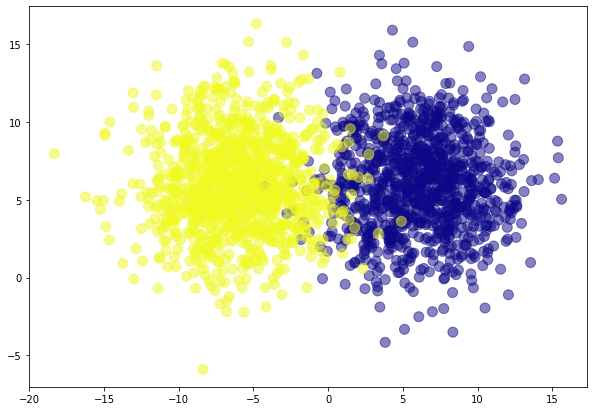

After Prediction of model [[9.9834192e-01 1.6580960e-03]
 [8.2284820e-01 1.7715180e-01]
 [1.9119101e-02 9.8088086e-01]
 ...
 [9.9829751e-01 1.7025458e-03]
 [5.7636248e-07 9.9999940e-01]
 [9.9771261e-01 2.2874433e-03]]
19/19 [==============================] - 0s 577us/step - loss: 0.0670 - accuracy: 0.9767


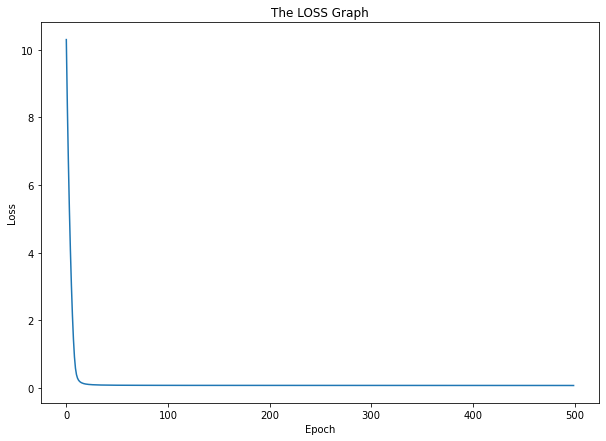

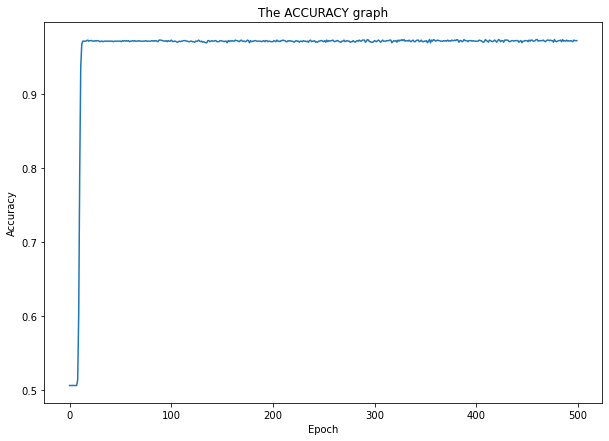

Test results - Loss: 0.06702271103858948 - Accuracy: 97.66666889190674%


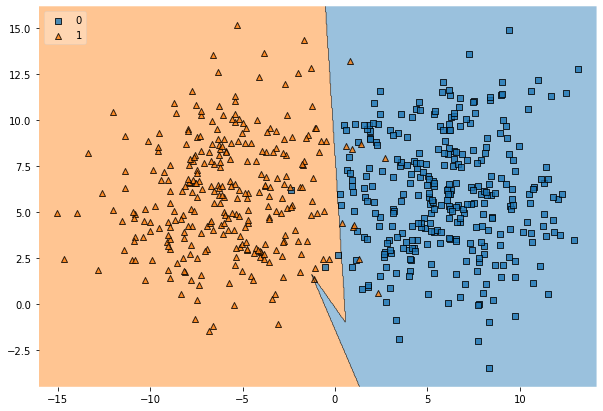


**************************The  7  NN************************************


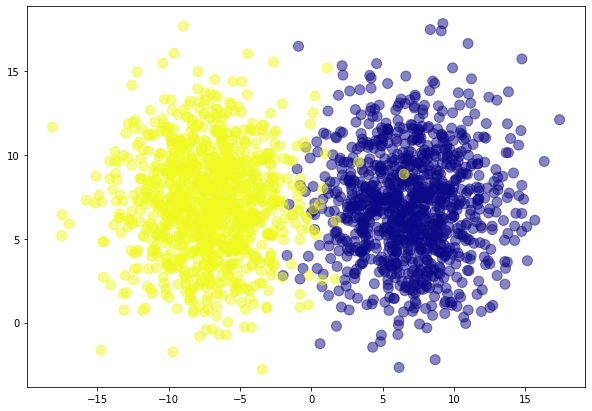

After Prediction of model [[5.5570737e-04 9.9944431e-01]
 [5.2910191e-01 4.7089803e-01]
 [8.1237247e-03 9.9187624e-01]
 ...
 [4.2379404e-05 9.9995756e-01]
 [6.5799402e-03 9.9342006e-01]
 [7.7123183e-04 9.9922872e-01]]
19/19 [==============================] - 0s 735us/step - loss: 0.0228 - accuracy: 0.9917


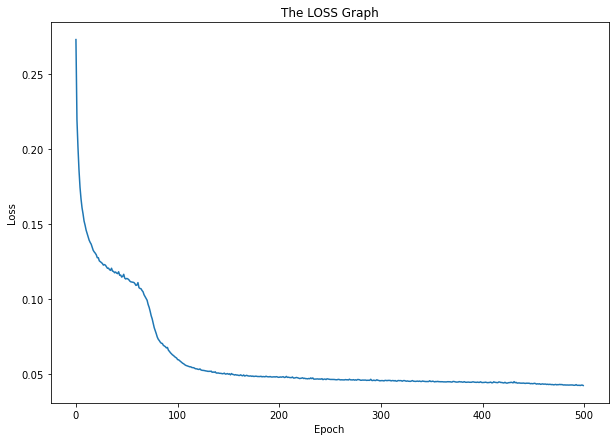

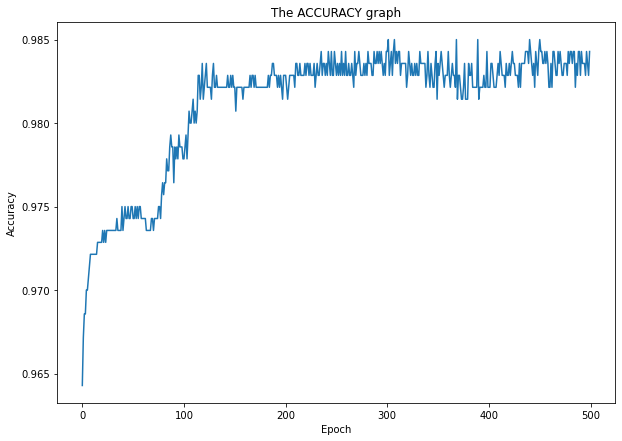

Test results - Loss: 0.022779220715165138 - Accuracy: 99.16666746139526%


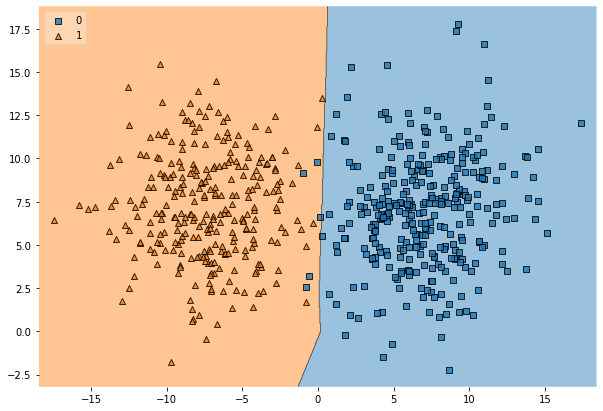


**************************The  8  NN************************************


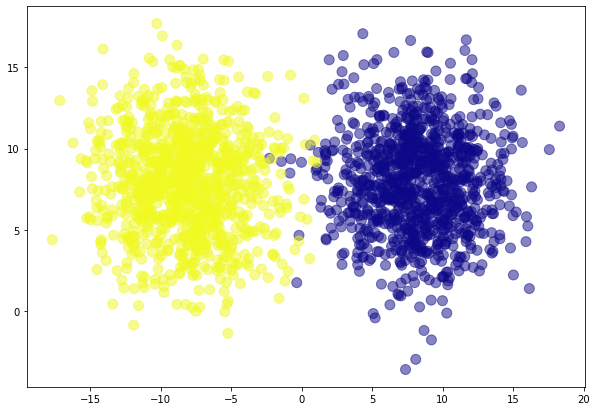

After Prediction of model [[2.5900900e-07 9.9999976e-01]
 [2.5900900e-07 9.9999976e-01]
 [2.5900900e-07 9.9999976e-01]
 ...
 [9.9912709e-01 8.7291340e-04]
 [9.9912709e-01 8.7291340e-04]
 [2.5900900e-07 9.9999976e-01]]
19/19 [==============================] - 0s 682us/step - loss: 0.0319 - accuracy: 0.9967


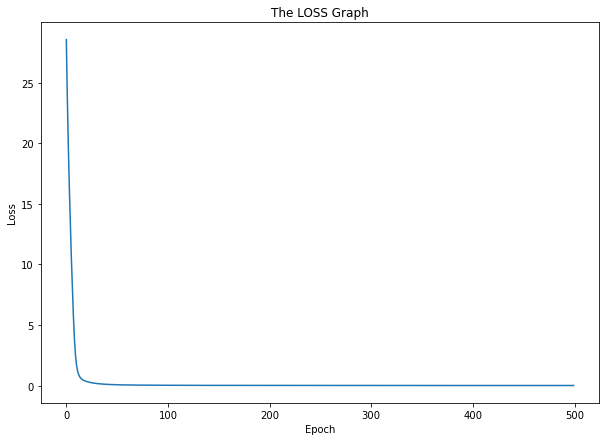

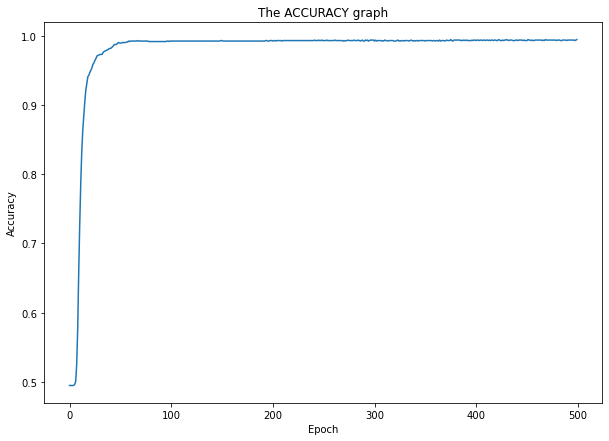

Test results - Loss: 0.031914565712213516 - Accuracy: 99.6666669845581%


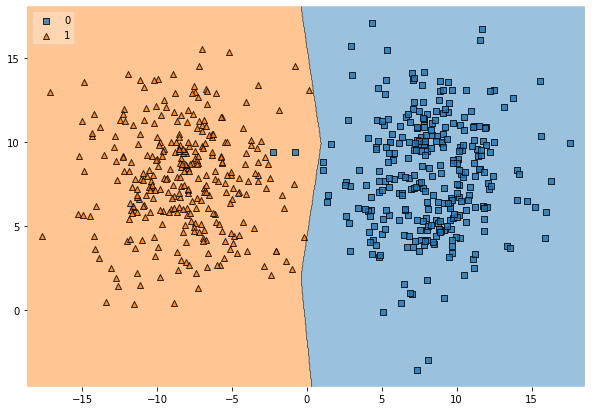


**************************The  9  NN************************************


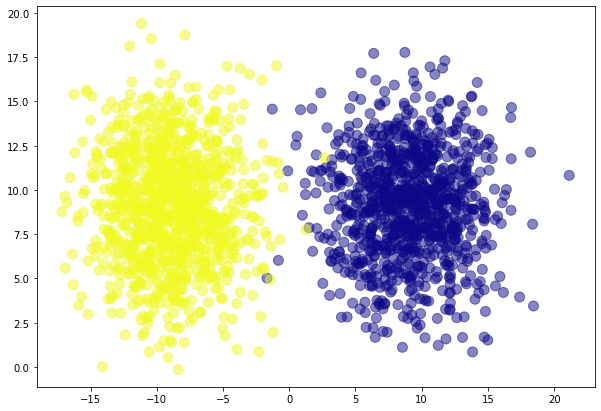

After Prediction of model [[9.9957734e-01 4.2268151e-04]
 [1.6122162e-07 9.9999988e-01]
 [9.9999917e-01 8.6084611e-07]
 ...
 [9.9999952e-01 4.3832884e-07]
 [8.6316274e-04 9.9913687e-01]
 [2.4324131e-06 9.9999762e-01]]
19/19 [==============================] - 0s 630us/step - loss: 0.0061 - accuracy: 0.9983


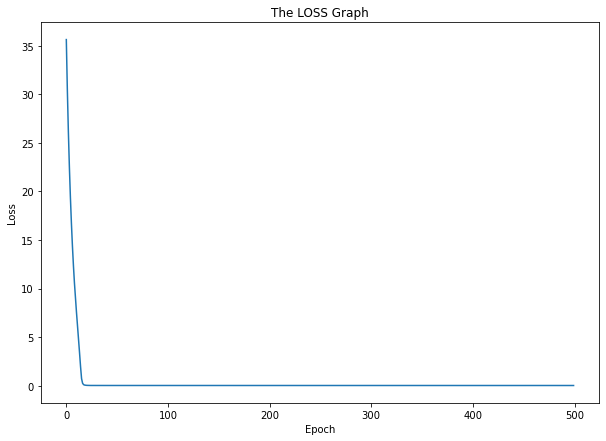

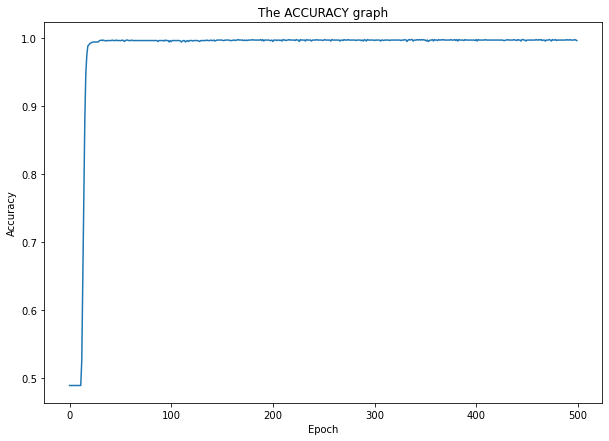

Test results - Loss: 0.006133304443210363 - Accuracy: 99.83333349227905%


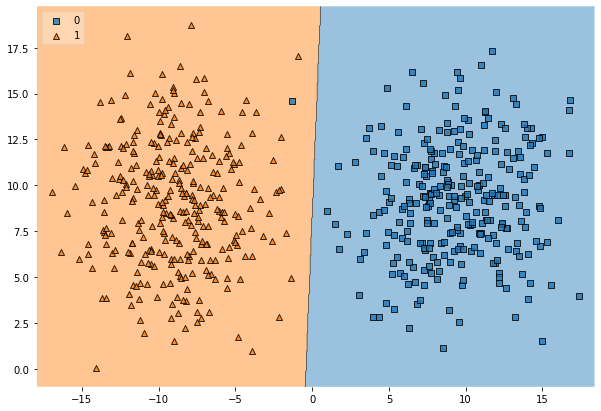

In [20]:
def main():
    
    print("****************************The Original NN*************************************")
    OldDataset()
    for i in range (1,10): 
        print("\n**************************The ",i," NN************************************")
        NewDataset(i)
    
if __name__ == "__main__":
    main()